In [53]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync/')
import SLEEPY as sl
import matplotlib.pyplot as plt
import numpy as np

In [54]:
ex0=sl.ExpSys(v0H=600,Nucs=['15N','1H'],vr=60000,pwdavg=sl.PowderAvg(q=2))
delta=sl.Tools.dipole_coupling(.102,'15N','1H')
ex0.set_inter('dipole',i0=0,i1=1,delta=delta)
ex,kex=sl.Tools.Setup3siteSym(ex0,tc=1e-9,phi=15*np.pi/180)

L=sl.Liouvillian(ex,kex=kex)

v1=150e3 #100 kHz pulse
tp=1/v1/2 #pi/2 pulse length
tau=L.taur*.1 #REDOR shift

t=[0,L.taur/2-tp+tau,L.taur/2+tau,L.taur-tp,L.taur]
first=L.Sequence().add_channel('1H',t=t,v1=[0,v1,0,v1,0],phase=[0,0,0,np.pi/2,0])
t=[0,tp,L.taur/2-tau,L.taur/2-tau+tp,L.taur]
second=L.Sequence().add_channel('1H',t=t,v1=[v1,0,v1,0],phase=[np.pi/2,0,0,0,0])
center=L.Sequence().add_channel('15N',t=[0,L.taur/2-tp/2,L.taur/2+tp/2,L.taur],
                               v1=[0,v1,0])

rho=sl.Rho('15Nx','15Nx')

In [ ]:
Ucenter=center.U()
Ufirst=first.U()
Usecond=second.U()

In [48]:
rho=sl.Rho('15Nx','15Nx')
U1=L.Ueye()
U2=L.Ueye()

for k in range(48):
    (U2*Ucenter*U1*rho)()
    U1=Ufirst*U1
    U2=Usecond*U2

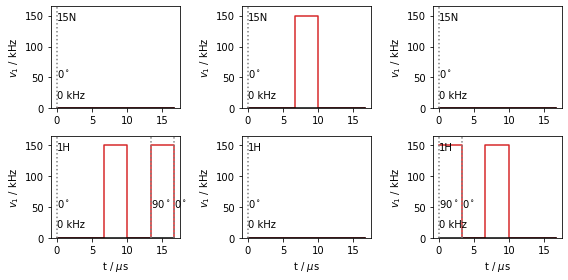

In [49]:
fig,ax=plt.subplots(2,3)
first.plot(ax=ax.T[0])
center.plot(ax=ax.T[1])
second.plot(ax=ax.T[2])
fig.set_size_inches([8,4])
fig.tight_layout()

<AxesSubplot:xlabel='t / ms', ylabel='<$^{15}N_x$>'>

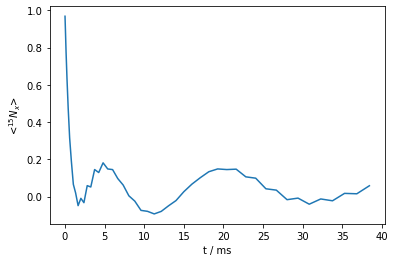

In [50]:
rho.plot()